In [1]:
from tensorflow.keras.datasets import cifar10
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000,), (10000, 32, 32, 3), (10000,))

[0 1 2 3 4 5 6 7 8 9]


<BarContainer object of 10 artists>

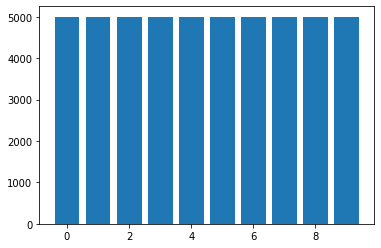

In [6]:
label, count = np.unique(y_train, return_counts=True)
import matplotlib.pyplot as plt
print(label)
plt.bar(x=label, height=count)

In [7]:
label = ('Airplane', 'Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck')

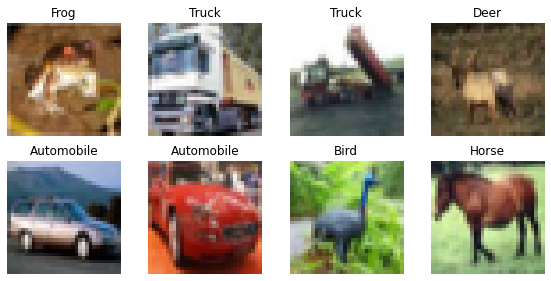

In [8]:
fig = plt.figure(figsize=(8,4))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_train[i], cmap = 'gray')
    plt.gca().set_title(label[y_train[i]])
    plt.axis('off')
fig.tight_layout()
plt.show()

In [9]:
from tensorflow.keras.utils import to_categorical
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
def normalize_image(image):
    mean = np.mean(image, axis = (0,1,2))
    std = np.std(image, axis = (0,1,2))
    image = (image - mean) / std
    return image

In [11]:
x_train = normalize_image(x_train)
x_test = normalize_image(x_test)

In [12]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [18]:
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.models import Model, Sequential

In [14]:
# 함수형
inputs = Input(shape = (32,32,3))
outputs = Flatten()(inputs)
outputs = Dense(50, activation = 'sigmoid')(outputs)
outputs = Dense(10,activation = 'softmax')(outputs)
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 50)                153650    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 154,160
Trainable params: 154,160
Non-trainable params: 0
_________________________________________________________________


In [19]:
from tensorflow.keras.optimizers import RMSprop, Adam
rms = RMSprop()
Adam = Adam()

model.compile(optimizer=rms, loss='categorical_crossentropy', metrics=['acc'])
model.fit(x_train, y_train, epochs=100, batch_size = 400, validation_split=0.1, verbose = 1)

Epoch 1/100
113/113 [==============================] - 1s 5ms/step - loss: 1.4039 - acc: 0.5200 - val_loss: 1.6684 - val_acc: 0.4336
Epoch 2/100
113/113 [==============================] - 1s 5ms/step - loss: 1.3544 - acc: 0.5425 - val_loss: 1.6671 - val_acc: 0.4366
Epoch 3/100
113/113 [==============================] - 0s 4ms/step - loss: 1.3554 - acc: 0.5425 - val_loss: 1.6665 - val_acc: 0.4360
Epoch 4/100
113/113 [==============================] - 0s 4ms/step - loss: 1.3434 - acc: 0.5452 - val_loss: 1.6754 - val_acc: 0.4290
Epoch 5/100
113/113 [==============================] - 0s 4ms/step - loss: 1.3333 - acc: 0.5494 - val_loss: 1.6673 - val_acc: 0.4368
Epoch 6/100
113/113 [==============================] - 0s 4ms/step - loss: 1.3243 - acc: 0.5494 - val_loss: 1.6695 - val_acc: 0.4374
Epoch 7/100
113/113 [==============================] - 0s 4ms/step - loss: 1.3206 - acc: 0.5526 - val_loss: 1.6702 - val_acc: 0.4362
Epoch 8/100
113/113 [==============================] - 0s 4ms/step - 

In [20]:
# 시퀀스 형
model = Sequential()
model.add(Flatten(input_shape = (32,32,3)))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

from tensorflow.keras.optimizers import RMSprop, Adam
rms = RMSprop()
Adam = Adam()

model.compile(optimizer=rms, loss='categorical_crossentropy', metrics=['acc'])
model.fit(x_train, y_train, epochs=100, batch_size = 400, validation_split=0.1, verbose = 1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                153650    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 154,160
Trainable params: 154,160
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
113/113 [==============================] - 1s 5ms/step - loss: 1.9605 - acc: 0.3165 - val_loss: 1.7690 - val_acc: 0.3894
Epoch 2/100
113/113 [==============================] - 0s 4ms/step - loss: 1.7258 - acc: 0.4043 - val_loss: 1.7109 - val_acc: 0.4142
Epoch 3/100
113/113 [==============================] - 1s 5ms/step - loss: 1.6588 - acc: 0.4306 - val_loss: 1.7066

In [39]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [40]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [41]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [42]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [43]:
import os
path = 'temp/logs/'
if not os.path.isdir(path):
    os.mkdir(path)
log_path = path + 'mnist'

In [44]:
from tensorflow.keras.callbacks import TensorBoard
callbacks = TensorBoard(log_dir = log_path,update_freq='epoch', histogram_freq = 10,write_images = True)

In [49]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

from tensorflow.keras.optimizers import RMSprop, Adam
rms = RMSprop()
Adam = Adam()

model.compile(optimizer=rms, loss='categorical_crossentropy', metrics=['acc'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [52]:
ret = model.fit(x_train , y_train , epochs=100, batch_size = 50, validation_split=0.2, verbose = 1, callbacks = [callbacks])

Epoch 1/100
960/960 [==============================] - 3s 3ms/step - loss: 0.0622 - acc: 0.9832 - val_loss: 0.1116 - val_acc: 0.9672
Epoch 2/100
960/960 [==============================] - 3s 3ms/step - loss: 0.0603 - acc: 0.9831 - val_loss: 0.1100 - val_acc: 0.9678
Epoch 3/100
960/960 [==============================] - 3s 3ms/step - loss: 0.0579 - acc: 0.9835 - val_loss: 0.1093 - val_acc: 0.9679
Epoch 4/100
960/960 [==============================] - 3s 3ms/step - loss: 0.0559 - acc: 0.9843 - val_loss: 0.1090 - val_acc: 0.9698
Epoch 5/100
960/960 [==============================] - 3s 3ms/step - loss: 0.0541 - acc: 0.9851 - val_loss: 0.1100 - val_acc: 0.9687
Epoch 6/100
960/960 [==============================] - 3s 3ms/step - loss: 0.0522 - acc: 0.9855 - val_loss: 0.1096 - val_acc: 0.9682
Epoch 7/100
960/960 [==============================] - 3s 3ms/step - loss: 0.0508 - acc: 0.9859 - val_loss: 0.1094 - val_acc: 0.9694
Epoch 8/100
960/960 [==============================] - 3s 3ms/step - 